# Review

- fsolve
- SIR like models

In [1]:
from scipy.optimize import minimize, fsolve
import numpy as np
import matplotlib.pyplot as plt

Find the roots of $x^2-1$

In [2]:
print(fsolve(lambda x: x**2 - 1, 0.5))
print(fsolve(lambda x: x**2 - 1, -0.5))

[1.]
[-1.]


## MT1 Q1

$$P_{n+1}-P_{n}=\frac{r}{12}P_{n}+x$$

Regular monthly deposit of $x$

Interest is compounded monthly at the end of each month with an annual rate $r$

$P_{n}$ is the balance at the end of month $n$

In [6]:
def f(P, r, x):
    return P + (r/12)*P + x

In [7]:
f(15000, 0.05, 250)

15312.5

In [8]:
def run(T, P0, r, x):
    Ps = [P0]
    for _ in range(T):
        Ps.append(f(Ps[-1], r, x))
    return Ps

In [9]:
run(12*5, 5000, 0.02, 100)[-1], run(12*5, 5000, 0.02, 100)[-1] - 5000 - 100*12*5, 100*12*5

(11830.130224503268, 830.1302245032675, 6000)

**Question:**

What deposits amount is required to get 1 000 000 \$ in 20 years if the interest rate is 5% and `started from the bottom` (0)?

In [10]:
fsolve(lambda x: run(12*20, 0, 0.05, x)[-1] - 1000000, 1000000)

array([2432.8907255])

In [11]:
# function that takes in number 0 to 11 and returns the month
def m(i):
    return ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][i]

In [12]:
for month, balance in enumerate(run(12*20, 0, 0.05, 2432.9)):
    print(f"{m((month+10)%12)} {2023 + int(month/12)}: {balance:.0f}$")

Nov 2023: 0$
Dec 2023: 2433$
Jan 2023: 4876$
Feb 2023: 7329$
Mar 2023: 9793$
Apr 2023: 12266$
May 2023: 14750$
Jun 2023: 17245$
Jul 2023: 19749$
Aug 2023: 22265$
Sep 2023: 24790$
Oct 2023: 27326$
Nov 2024: 29873$
Dec 2024: 32431$
Jan 2024: 34999$
Feb 2024: 37577$
Mar 2024: 40167$
Apr 2024: 42767$
May 2024: 45378$
Jun 2024: 48000$
Jul 2024: 50633$
Aug 2024: 53277$
Sep 2024: 55932$
Oct 2024: 58598$
Nov 2025: 61275$
Dec 2025: 63963$
Jan 2025: 66662$
Feb 2025: 69373$
Mar 2025: 72095$
Apr 2025: 74828$
May 2025: 77573$
Jun 2025: 80329$
Jul 2025: 83097$
Aug 2025: 85876$
Sep 2025: 88667$
Oct 2025: 91469$
Nov 2026: 94283$
Dec 2026: 97109$
Jan 2026: 99946$
Feb 2026: 102796$
Mar 2026: 105657$
Apr 2026: 108530$
May 2026: 111415$
Jun 2026: 114312$
Jul 2026: 117221$
Aug 2026: 120143$
Sep 2026: 123076$
Oct 2026: 126022$
Nov 2027: 128980$
Dec 2027: 131950$
Jan 2027: 134933$
Feb 2027: 137928$
Mar 2027: 140936$
Apr 2027: 143956$
May 2027: 146988$
Jun 2027: 150034$
Jul 2027: 153092$
Aug 2027: 156163$
Sep

In [114]:
run(12*20, 0, 0.05, 2432.9)[-1] - 2432.9*12*20

416107.8121318007

**Question:** 

What initial balance is required to get 1 000 000 \$ in 20 years if the interest rate is 5%, depositing 800 \$ monthly.

In [88]:
from scipy.optimize import fsolve
fsolve(lambda P0: run(12*20, P0, 0.05, 800)[-1] - 1000000, 1000000)

array([247424.27839753])

In [89]:
run(12*20, 247424.27839753, 0.05, 800)[-1]                                                                                                                              + 0.0000000031

1000000.0

**Question:** 

What number of years is required to get 50000 with 5% interest if the deposit is 800, starting from 10000?

In [107]:
def gee(y):
    return run(int(12*y), 10000, 0.05, 800)[-1] - 50000

gee(3.667)


552.9759251302603

In [111]:
run(int(12*3.666), 10000, 0.05, 800)[-1]

49546.5320416235

**Question:**

After the 20 years, what amount can we sustainably withdraw each month for the next 20 years if the interest rate is 5% and started from 0?

In [140]:
def f(P, r, x):
    return P + (r/12)*P - x

run(12*20, 1000000, 0.05, 6599)[-1] # ok but i dont want to evaluate this over an over guessing to find it...

fsolve(lambda x: run(12*20, 1000000, 0.05, x)[-1] - 0, 1000000)

array([6599.55739217])

# SIR like models

$$\frac{dS}{dt} = -\frac{\beta S I}{N}$$

$$\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

$S_0 = 0.99$

$I_0 =  0.01$ 

$R_0 = 0$

$\beta = 0.2$ and $\gamma = 0.1$

In [11]:
beta = 0.2
gamma = 0.1

def dS(S, I, R):
    return -beta*S*I

def dI(S, I, R):
    return beta*S*I - gamma*I

def dR(S, I, R):
    return gamma*I

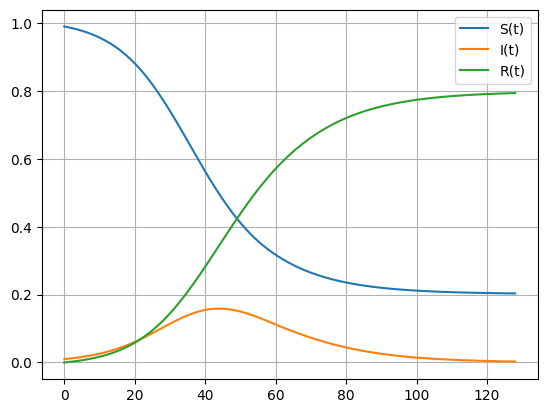

In [12]:
from scipy.integrate import solve_ivp

def SIR(t, y):
    S, I, R = y
    return [dS(S, I, R), dI(S, I, R), dR(S, I, R)]

y0 = [0.99, 0.01, 0]
t = np.linspace(0, 128, 1000)

sol = solve_ivp(SIR, [0, 128], y0, t_eval=t)

plt.figure()
plt.plot(sol.t, sol.y[0], label='S(t)')
plt.plot(sol.t, sol.y[1], label='I(t)')
plt.plot(sol.t, sol.y[2], label='R(t)')
plt.grid()
plt.legend()

# these two code cells are very flexible and can easily be modified to change the model.

*sympy: symbolic python*

scipy: scientific python

numpy: numerical python

matplotlib: plotting python

pandas: data analysis python

## [SymPy `1.12` Release Notes](https://github.com/sympy/sympy/wiki/Release-Notes-for-1.12)

**...**
- polys
    - Add a galois_group() function, supporting polynomials up through degree 6.
    
**...**

In [142]:
from sympy import symbols, solve, Eq, simplify, lambdify

In [143]:
# from sympy.abc import x, y

x, y = symbols('x y')

solve([x + y - 1, x - y], [x, y])

{x: 1/2, y: 1/2}

In [146]:
# example using simplify and lambdify

x, y = symbols('x y')

solve([x**2 + y**2, x - y, 0], (x, y))

simplify(x**2 + y**2)

x**2 + y**2

In [154]:
f = lambdify([x, y], x**2 + y**2)
j = complex(0,1)
f(j,j)

(-2+0j)

MovieWriter imagemagick unavailable; using Pillow instead.


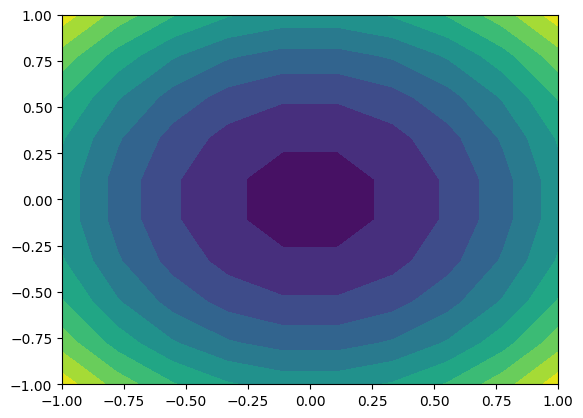

In [10]:
from itertools import product
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

def f(x, y, i):
    return x**2 + y**2 - i

x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)

X, Y = np.meshgrid(x, y)

Z = f(X, Y , 0.5)

fig, ax = plt.subplots()

ax.contourf(X, Y, Z, levels=10)

def init():
    ax.contourf(X, Y, Z, levels=10)
    return fig,

def update(i):
    Z = f(X, Y, i/100 - 0.5)
    ax.contourf(X, Y, Z, levels=10)
    return fig,

ani = FuncAnimation(fig, update, init_func=init, frames=100, interval=20, blit=True)

ani.save('animation.gif', writer='imagemagick', fps=60)

MovieWriter imagemagick unavailable; using Pillow instead.


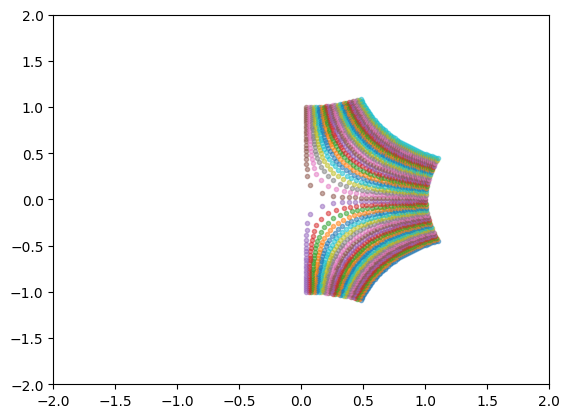

In [18]:
from itertools import product
import numpy as np
from matplotlib.animation import FuncAnimation

nums = np.linspace(-1, 1, 50)

fig, ax = plt.subplots()

def init():
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    return fig,

def update(i):
    ax.clear()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    for x,y in product(nums, nums):
        z = complex(x,y)
        w = z**(i/100 - 0.5)
        ax.plot(w.real, w.imag, '.', label=f"{w.real:.2f} + {w.imag:.2f}i", alpha=0.5)
    return fig,

ani = FuncAnimation(fig, update, init_func=init, frames=100, interval=20, blit=True)

ani.save('animation2.gif', writer='imagemagick', fps=60)

# for x,y in product(nums, nums):
#     z = complex(x,y)
#     plt.plot(z.real, z.imag, 'o', label=f"{x:.2f} + {y:.2f}i")
#     w = z**3
#     plt.plot(w.real, w.imag, 'o', label=f"{w.real:.2f} + {w.imag:.2f}i")


In [16]:
import os 

os.system('ls')

Lab-27-Oct-30.ipynb
Lab-28-Oct-30.ipynb
Lab-29-Oct-31
Lab-30-Nov-1.ipynb
started_from_the_bottom.png
sym.py


0

In [17]:
os.system('pwd')

/Users/jackbullen/Math-248/Labs/Week 10


0

In [18]:
import os
os.system('cat sym.py')

from sympy import Matrix, Eq, solve
from sympy.abc import N, P, m, c, K
import numpy as np

VARS = Matrix([N, P])

dNdt = [N*(1-N/K) - P*(m*N/(1+N))]
dPdt = [-c*P + P*(m*N/(1+N))] 

M = Matrix([dNdt, dPdt])

D = M.jacobian(VARS)
print("Matrix:", M)
print("Derivative", D)

# Now let's find the equilibrium points and evaluate the jacobian there.

eq1 = Eq(dNdt[0], 0)
eq2 = Eq(dPdt[0], 0)

equilibriums = solve((eq1, eq2), (N,P))
print("Equilibrium points:", equilibriums)

matrix_of_rates = Matrix([dNdt[0], dPdt[0]])
for e in equilibriums:
	A = D.subs(N,e[0])
	B = A.subs(P, e[1])
	print(B)

0

In [19]:
os.system('python3 sym.py')

Matrix: Matrix([[-N*P*m/(N + 1) + N*(1 - N/K)], [N*P*m/(N + 1) - P*c]])
Derivative Matrix([[N*P*m/(N + 1)**2 - P*m/(N + 1) + 1 - 2*N/K, -N*m/(N + 1)], [-N*P*m/(N + 1)**2 + P*m/(N + 1), N*m/(N + 1) - c]])
Equilibrium points: [(0, 0), (K, 0), (-c/(c - m), (-K*c + K*m - c)/(K*(c - m)**2))]
Matrix([[1, 0], [0, -c]])
Matrix([[-1, -K*m/(K + 1)], [0, K*m/(K + 1) - c]])
Matrix([[1 - c*m*(-K*c + K*m - c)/(K*(c - m)**3*(-c/(c - m) + 1)**2) + 2*c/(K*(c - m)) - m*(-K*c + K*m - c)/(K*(c - m)**2*(-c/(c - m) + 1)), c*m/((c - m)*(-c/(c - m) + 1))], [c*m*(-K*c + K*m - c)/(K*(c - m)**3*(-c/(c - m) + 1)**2) + m*(-K*c + K*m - c)/(K*(c - m)**2*(-c/(c - m) + 1)), -c*m/((c - m)*(-c/(c - m) + 1)) - c]])


0

# Simply sympy usage

In [61]:
from sympy.abc import a, b, c, d, e, f, g, h, i, j, k, l, m, n, x, y, z
from sympy import *

f = i**3 + j**3 - k**3
display(f)


f.subs( {i:1, j:2, k:3} )

In [62]:
from sympy.utilities.lambdify import lambdify

# another way to eval functino is using lambdify function,
# makes it so we need not use the subs  function everytime,
# and instead just call like a regular  function

# i believe it is faster to use lambdify, but i am not sure, 
# check this out later in the docs

# for this simple function it doesn't matter.
# but the future of math is right in front of you.

func = lambdify((i, j, k), f)

func(1, 2, 3)

# Still simple sympy usage

In [63]:
from sympy.abc import a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z, A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z, alpha, beta, gamma, delta, epsilon, zeta, eta, theta, iota, kappa, lamda, mu, nu, xi, omicron, pi, rho, sigma, tau, upsilon, phi, chi, psi, omega

In [64]:
from sympy import sin, cos, tan, cot, sec, csc, asin, acos, atan, acot, asec, acsc

x = r*sin(theta)*cos(phi)
y = r*sin(theta)*sin(phi)
z = r*cos(theta)

In [65]:
from sympy import init_printing
init_printing()

In [66]:
x,y,z

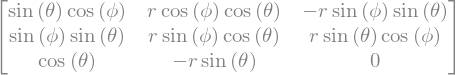

In [67]:
from sympy import Matrix
Matrix([x, y, z]).jacobian([r, theta, phi])

$$
ax + by + cz = d \\
ax + by + cz = e \\
ax + by + cz = f
$$

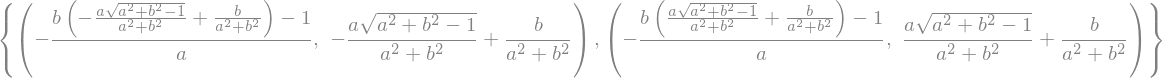

In [68]:
f = a*x + b*y - 1
g = x**2 + y**2 - 1

nonlinsolve([f, g], (x, y))


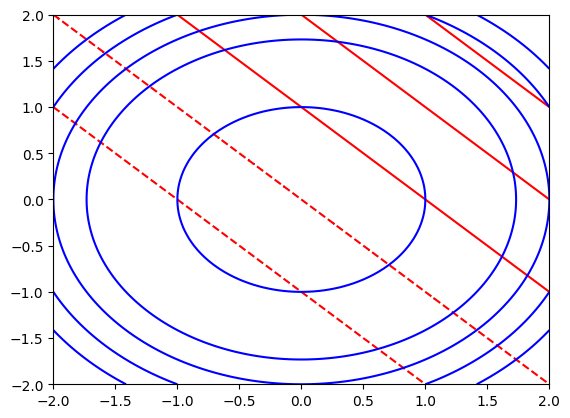

In [27]:
f = a*x + b*y - 1
g = x**2 + y**2 - 1

nonlinsolve([f, g], (x, y))

#lambdify this and make a plot
import matplotlib.pyplot as plt
import numpy as np
f = a*x + b*y - 1
g = x**2 + y**2 - 1

f_lambdified = lambdify((x, y, a, b), f)

g_lambdified = lambdify((x, y, a, b), g)

x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x_values, y_values)

plt.contour(X, Y, f_lambdified(X, Y, 1, 1), [-2,-1,0,1,2,3,4,5], colors='red')
plt.contour(X, Y, g_lambdified(X, Y, 1, 1), [-2,-1,0,2,3,4,5,10], colors='blue')

plt.show()


In [18]:
#lambdify this and make a plot
import matplotlib.pyplot as plt
import numpy as np
def run(f, g, x, y, A, B):
    nonlinsolve([f,g], (x,y))

    f_lambdified = lambdify((x, y, a, b), f)
    g_lambdified = lambdify((x, y, a, b), g)

    x_values = np.linspace(-2, 2, 100)
    y_values = np.linspace(-2, 2, 100)

    X, Y = np.meshgrid(x_values, y_values)
    
    plt.contour(X, Y, f_lambdified(X, Y, A, B), [0], colors='red')
    plt.contour(X, Y, g_lambdified(X, Y, A, B), [0], colors='blue')
    plt.grid()
    plt.axis('equal')
    plt.show()

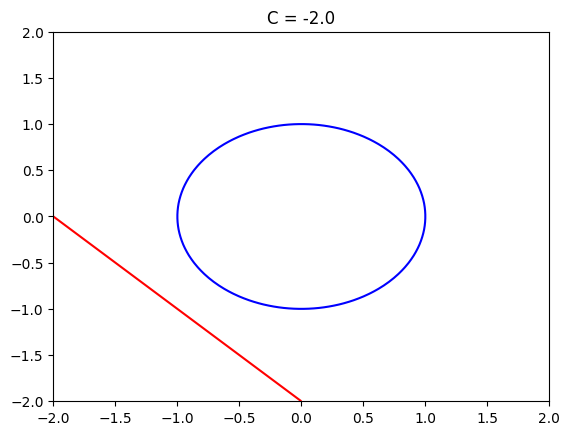

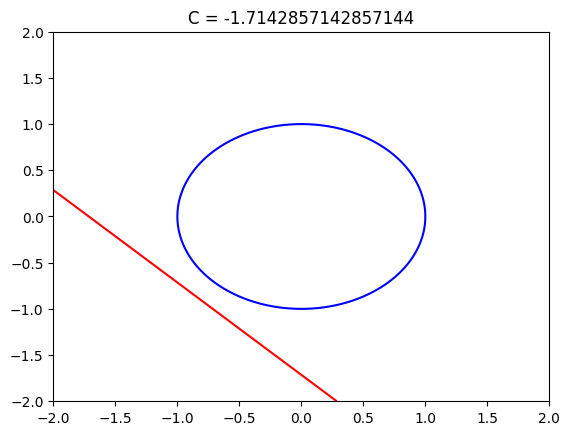

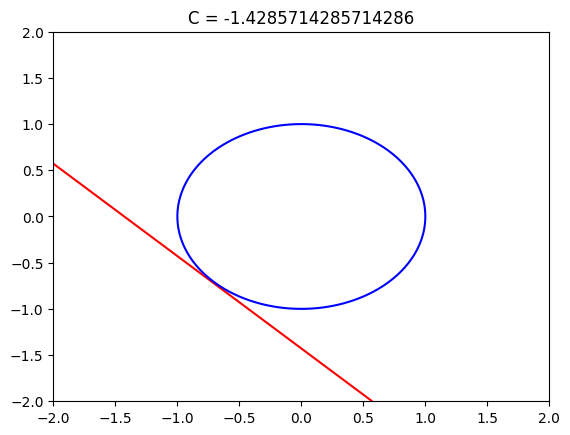

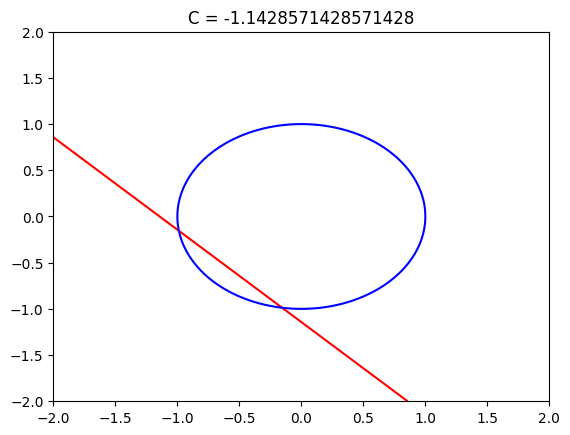

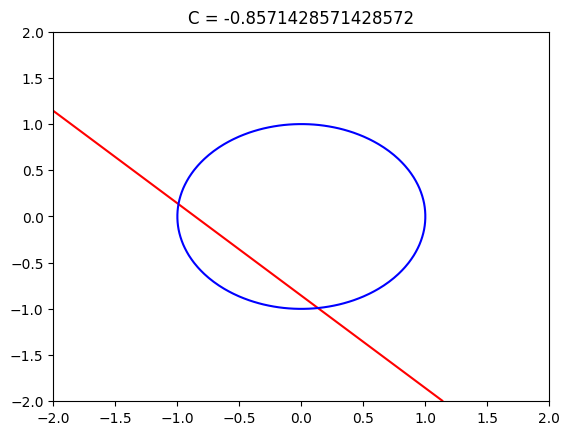

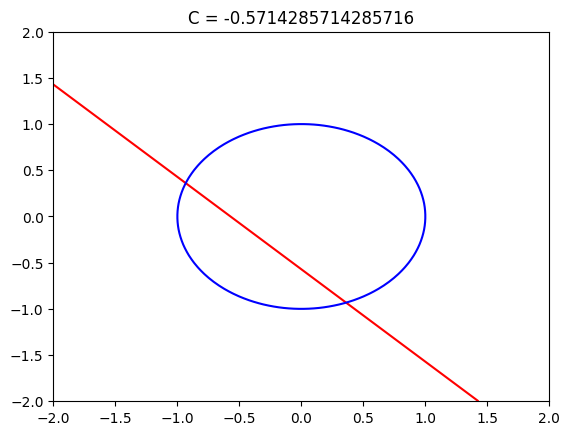

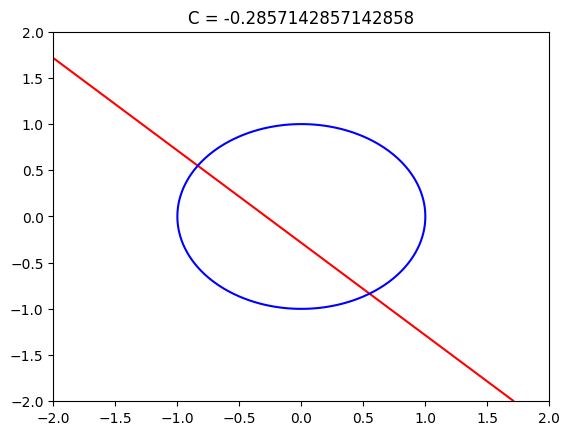

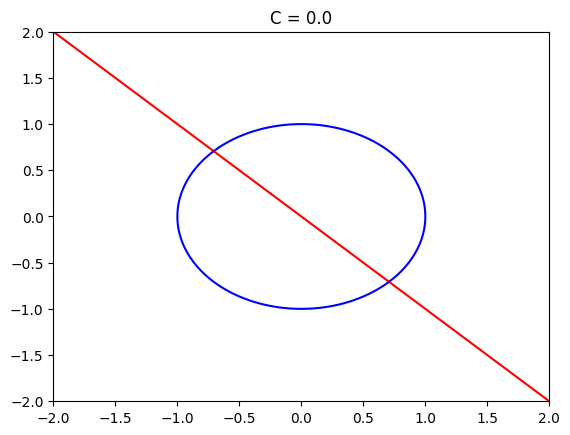

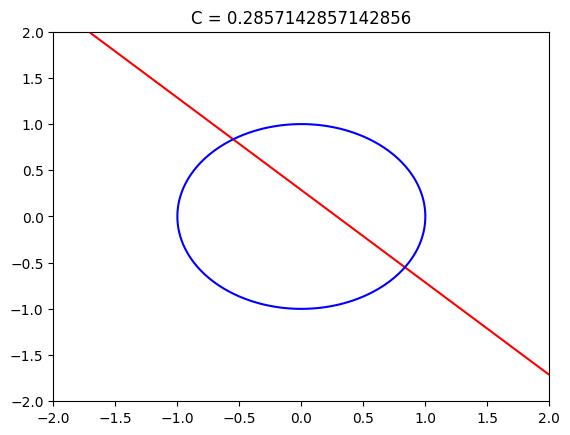

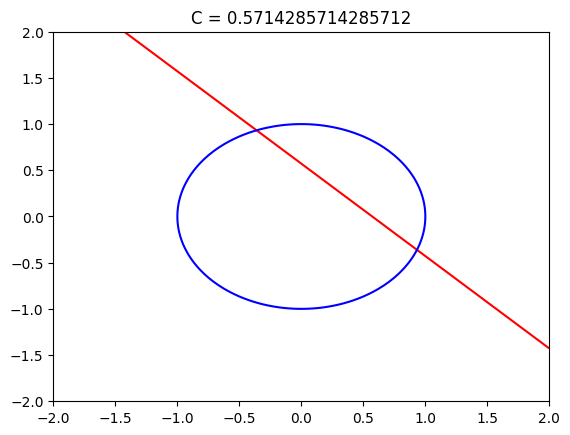

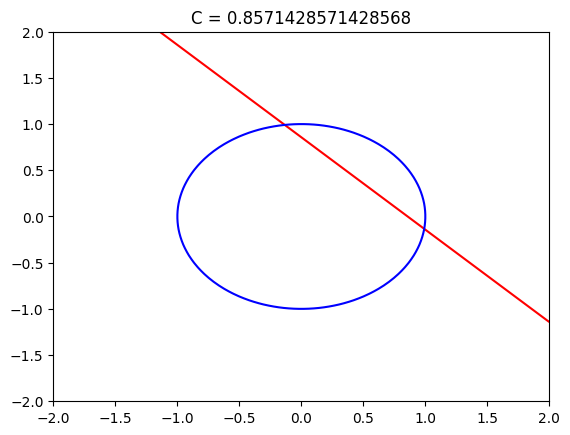

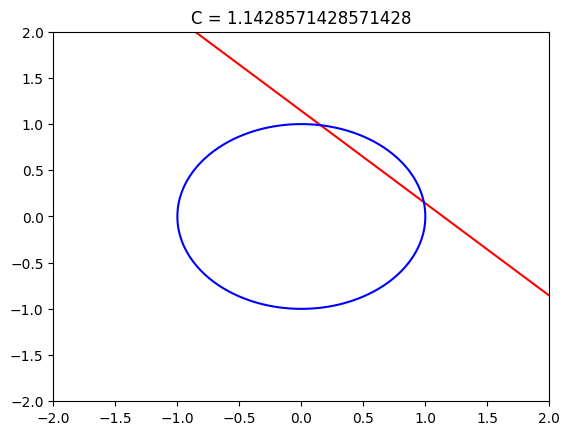

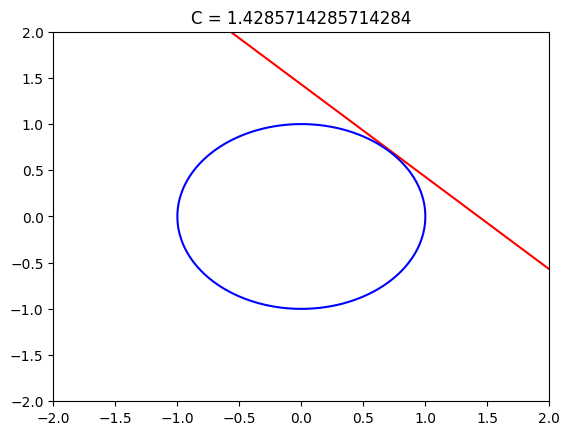

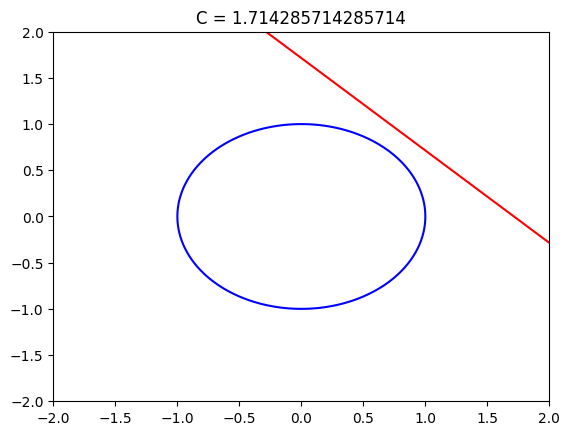

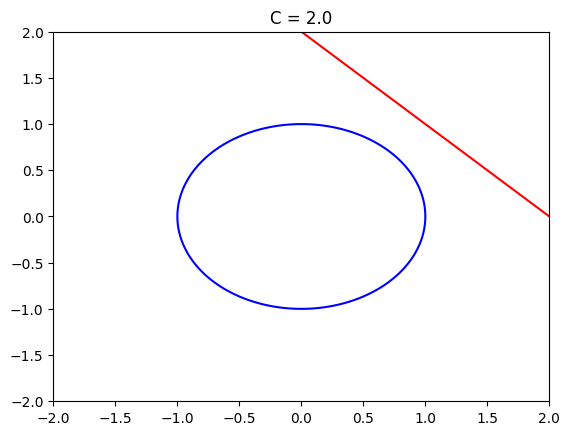

In [14]:
from sympy.abc import a, b, c, x, y, z

for C in np.linspace(-2, 2, 15):
    f = a*x + b*y - C
    g = x**2 + y**2 - 1
    plt.title("C = " + str(C))
    run(f, g, x, y, 1, 1)

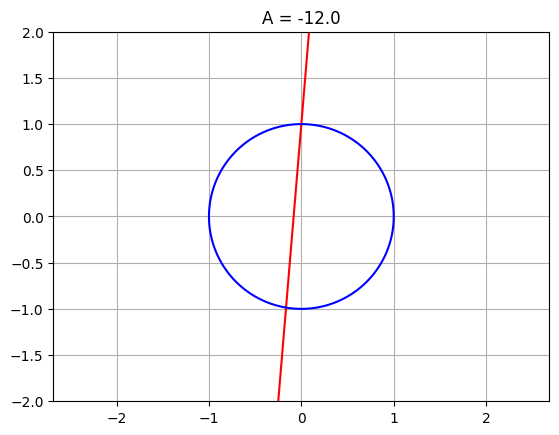

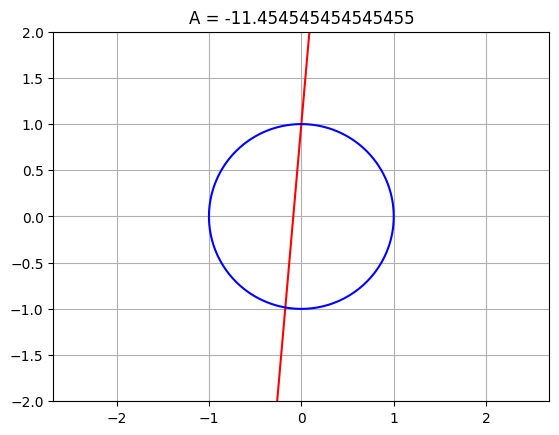

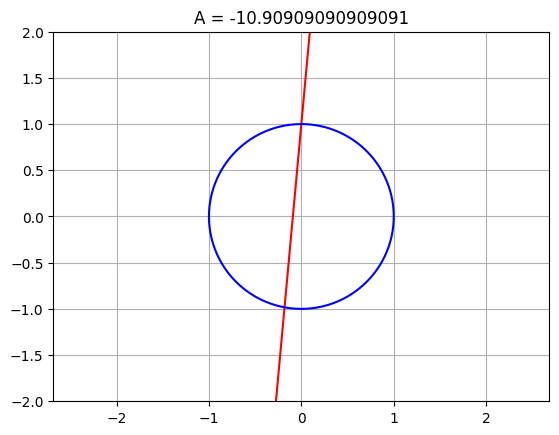

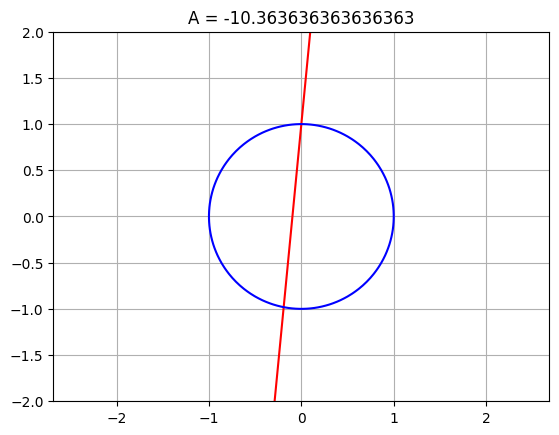

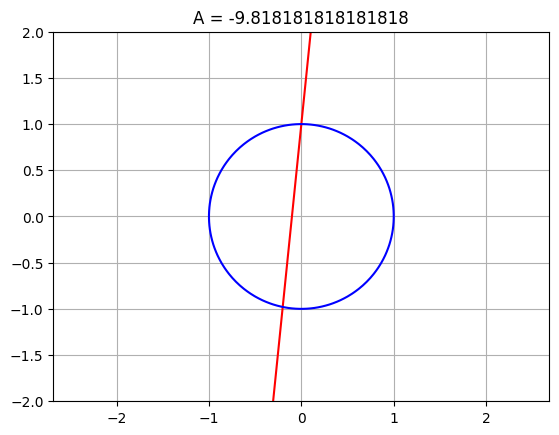

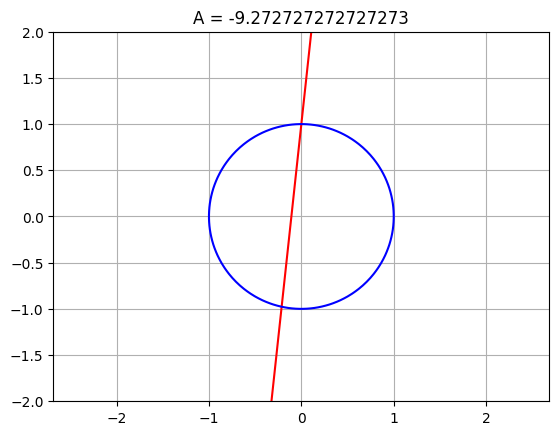

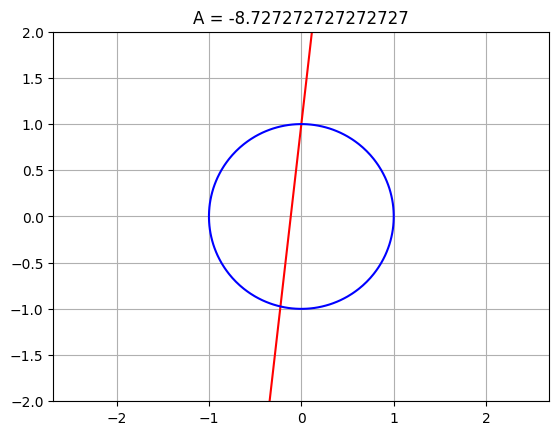

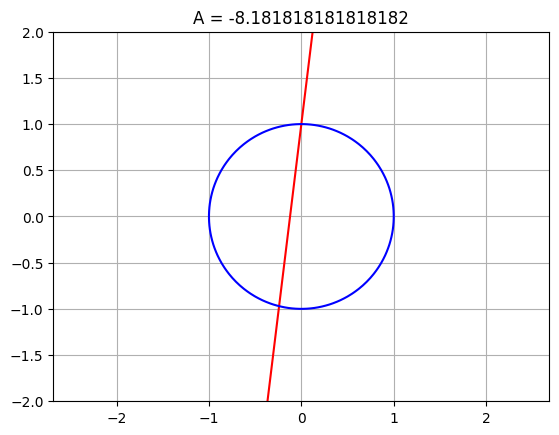

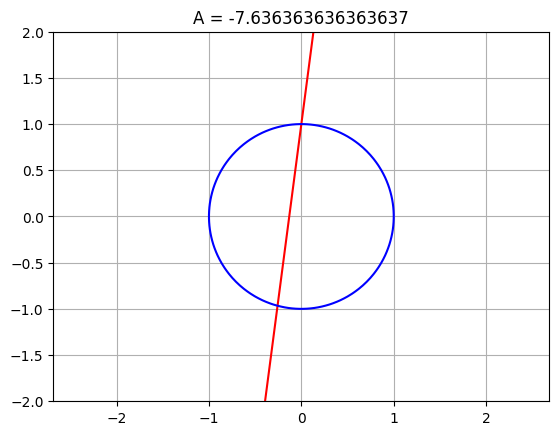

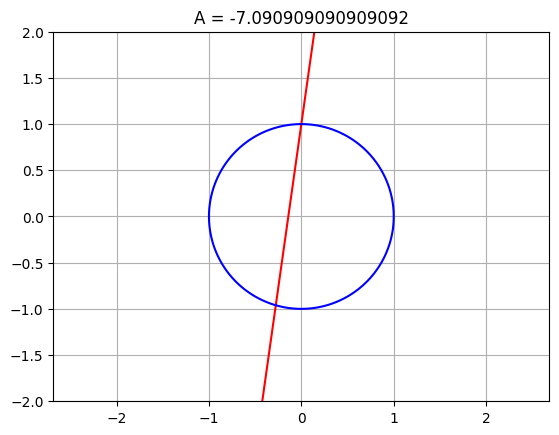

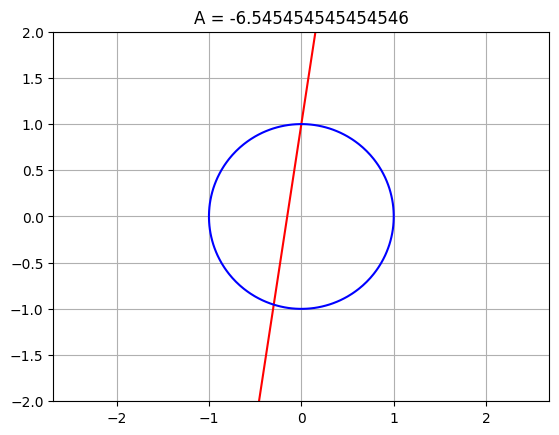

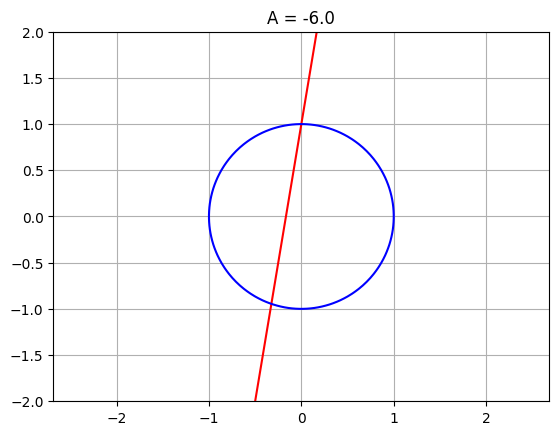

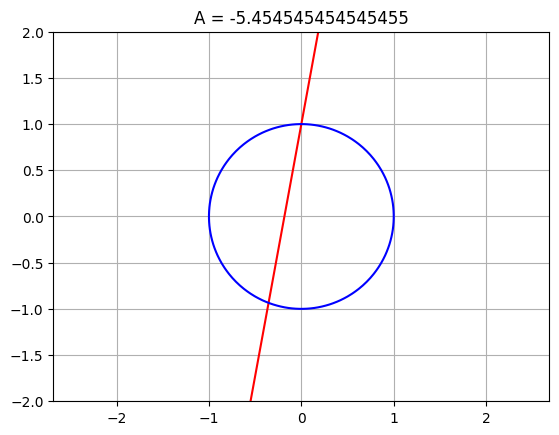

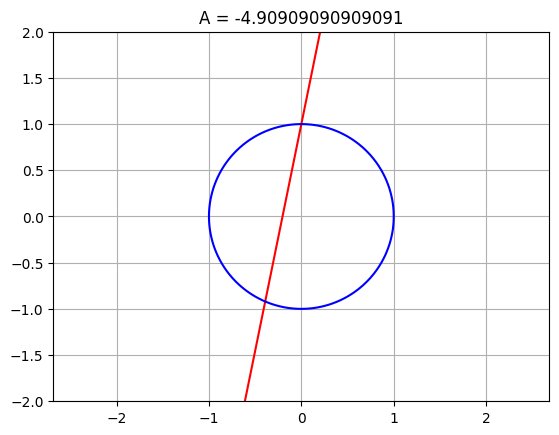

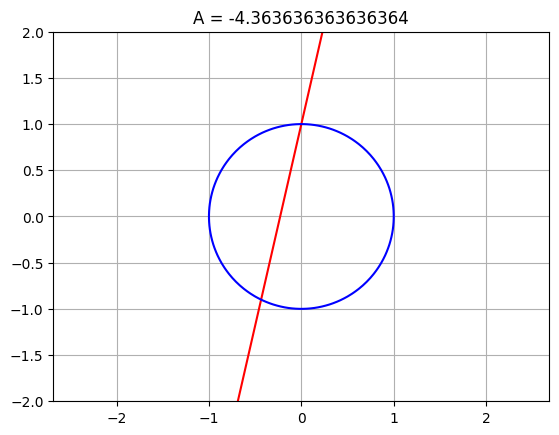

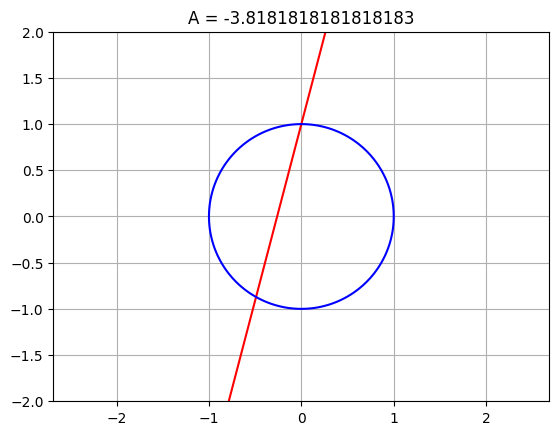

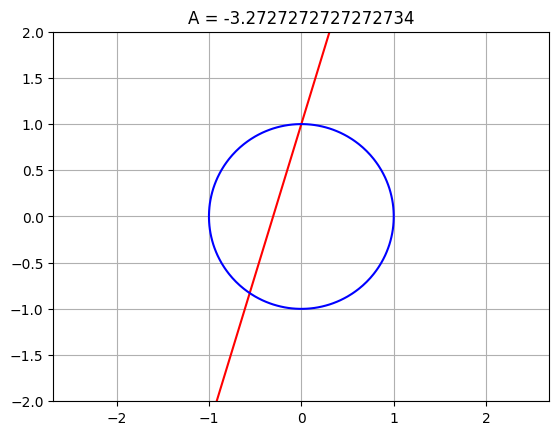

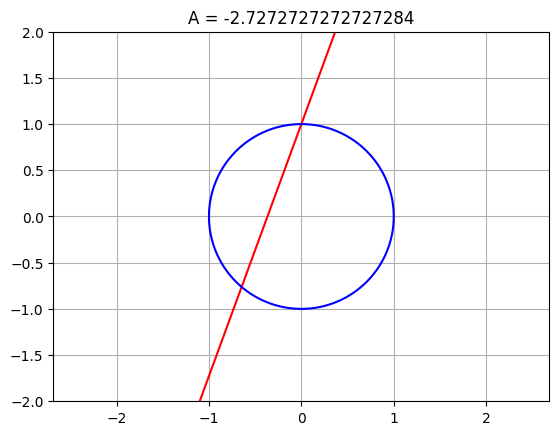

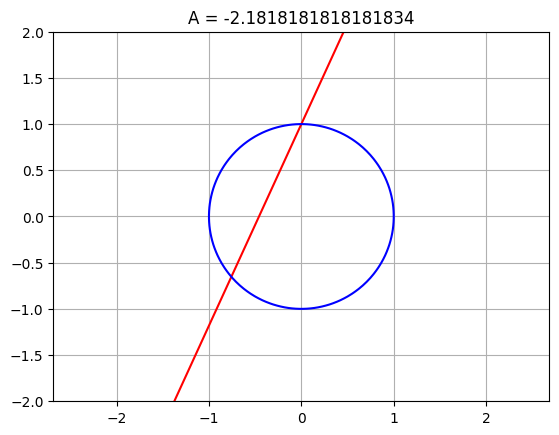

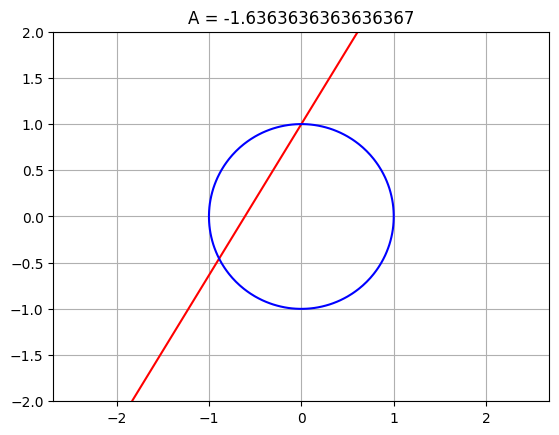

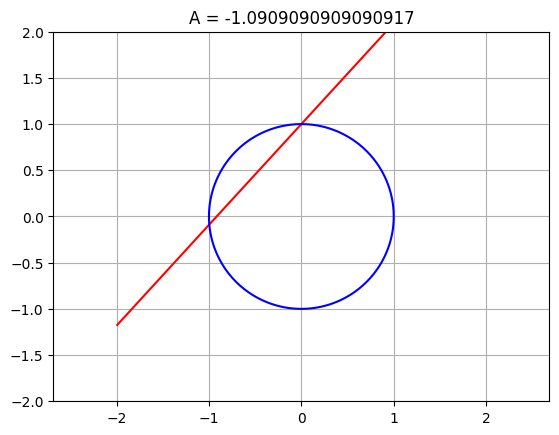

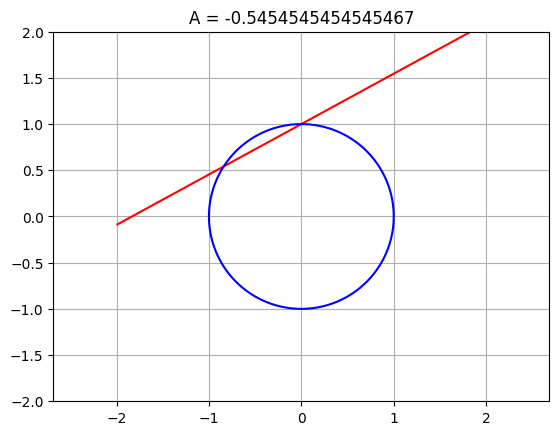

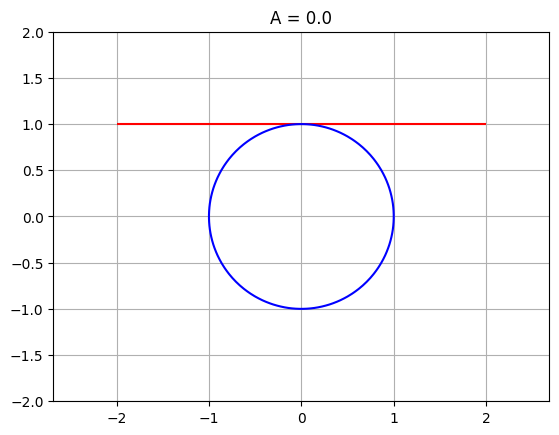

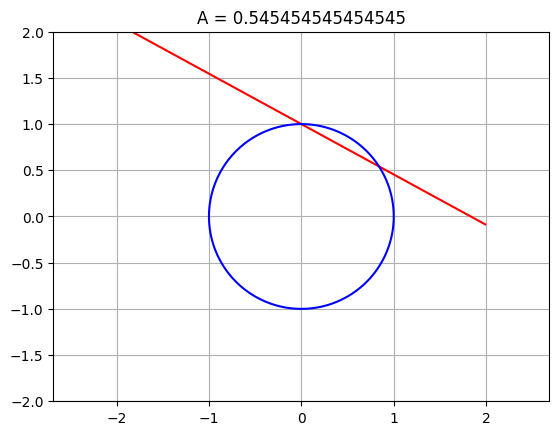

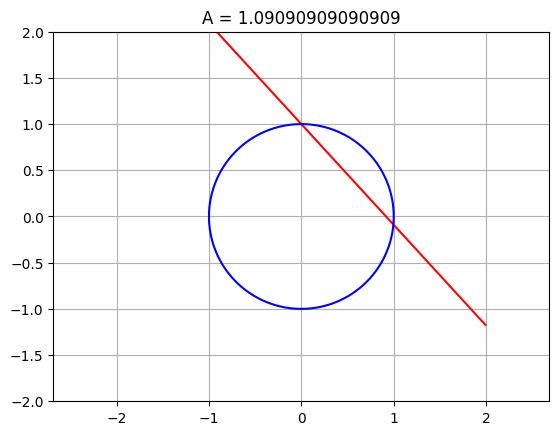

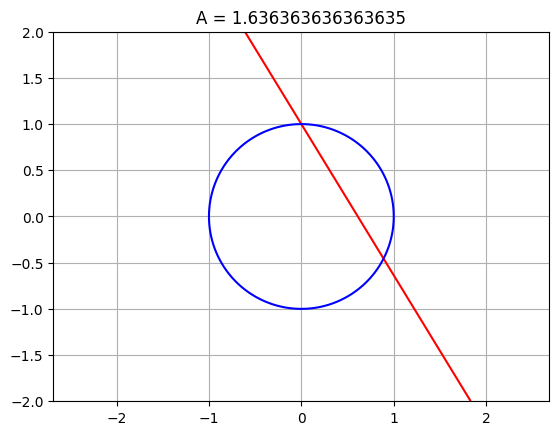

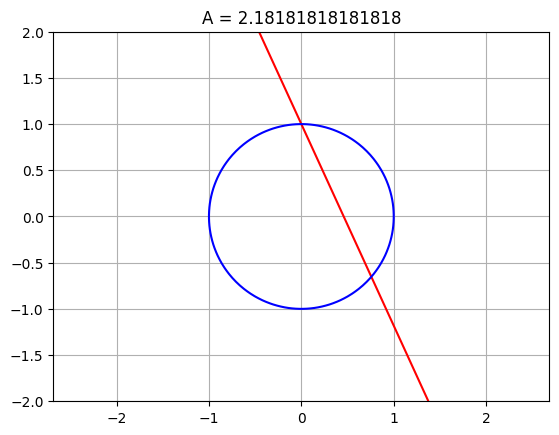

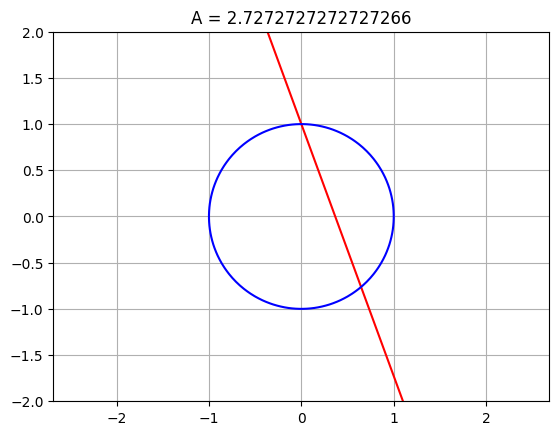

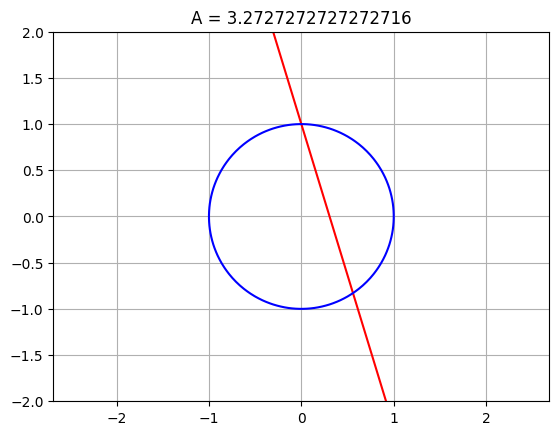

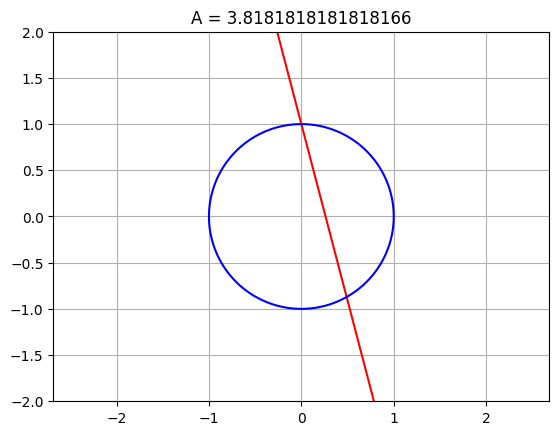

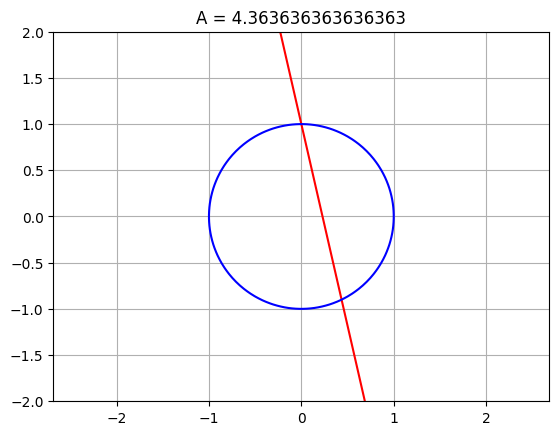

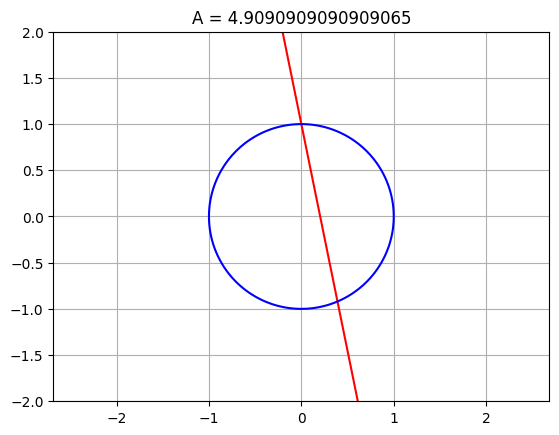

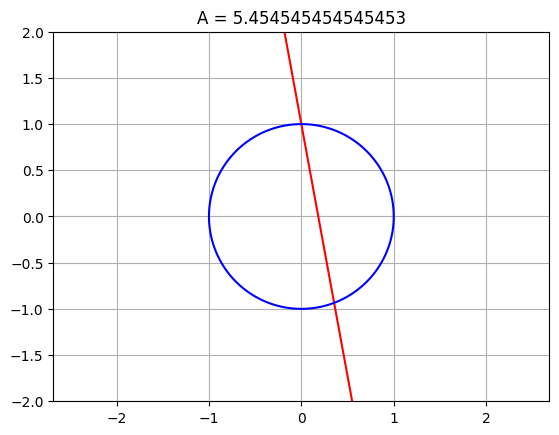

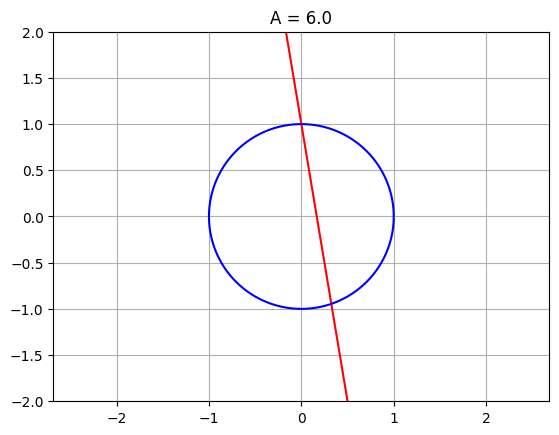

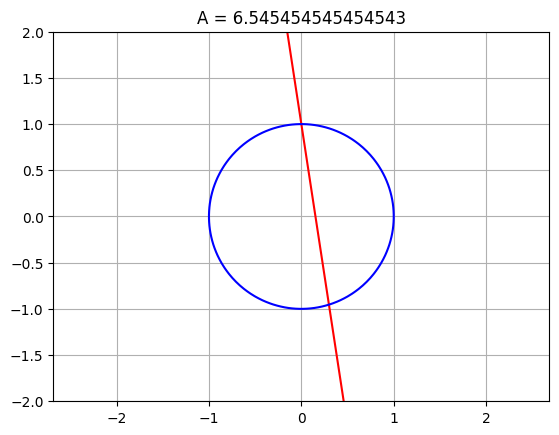

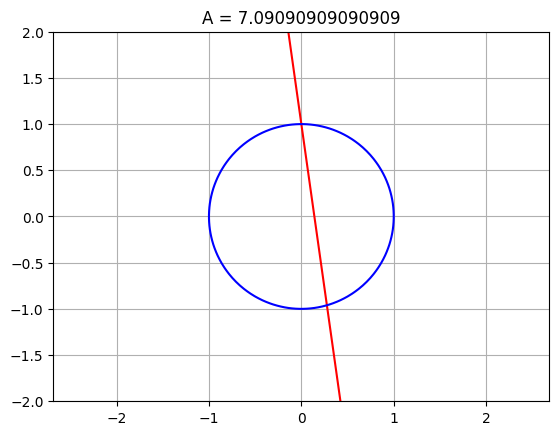

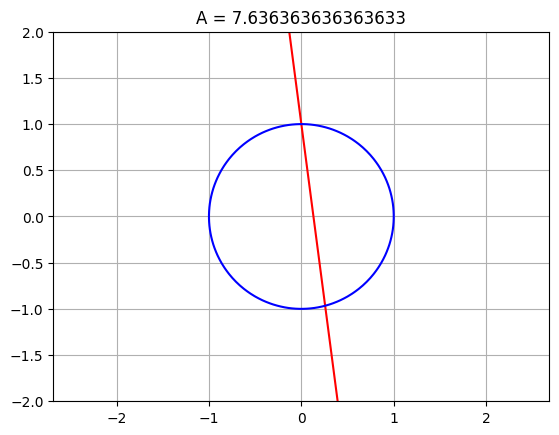

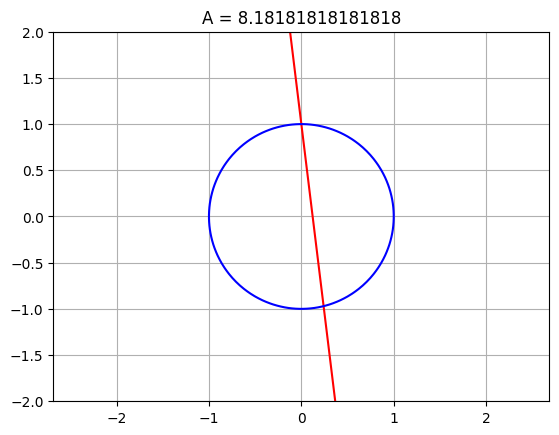

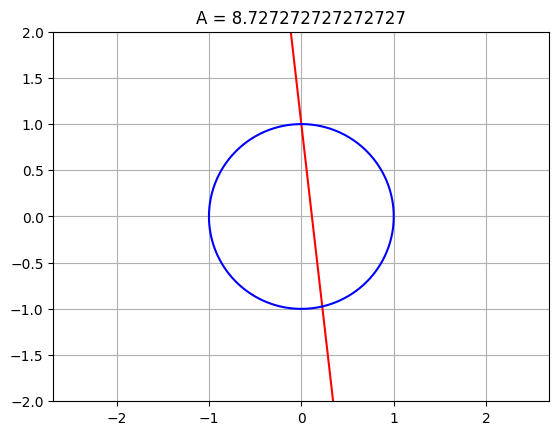

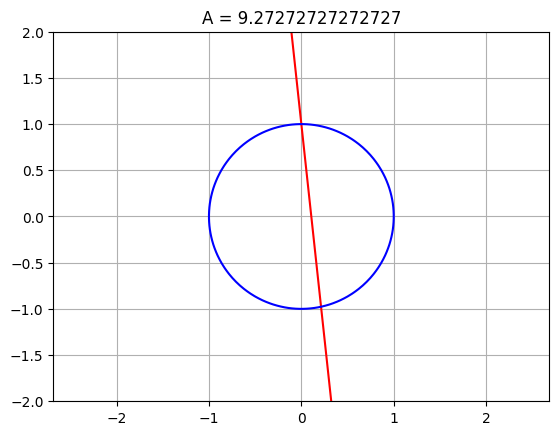

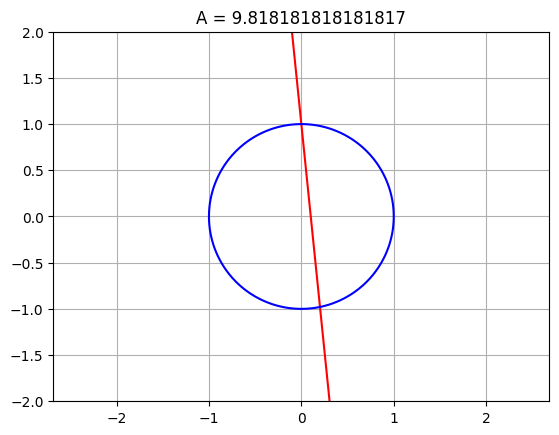

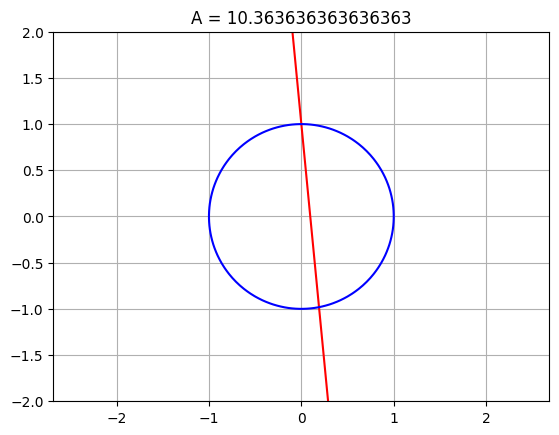

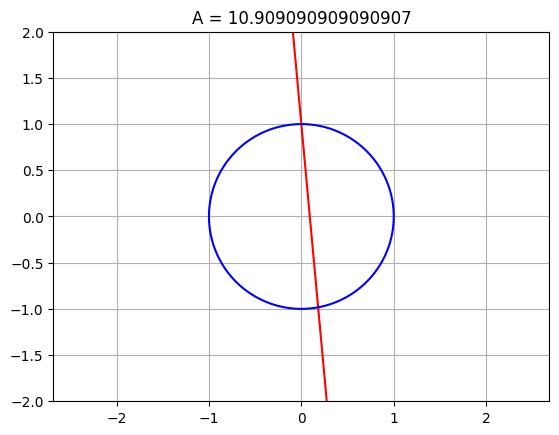

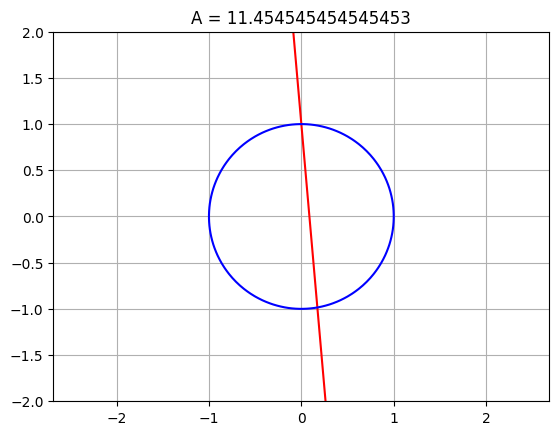

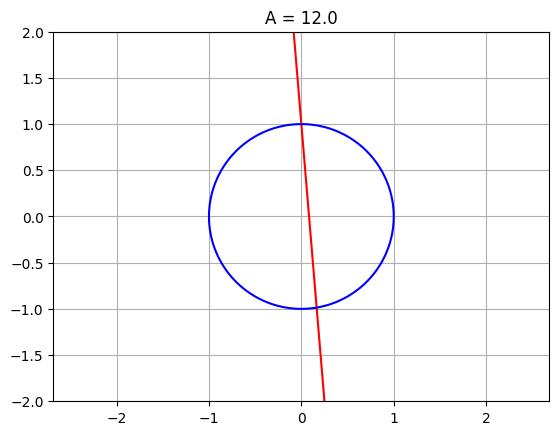

In [20]:
from sympy.abc import a, b, c, x, y, z

C = 1

for A in np.linspace(-12, 12, 45):
    f = a*x + b*y - C
    g = x**2 + y**2 - 1
    plt.title("A = " + str(A))
    run(f, g, x, y, A, 1)

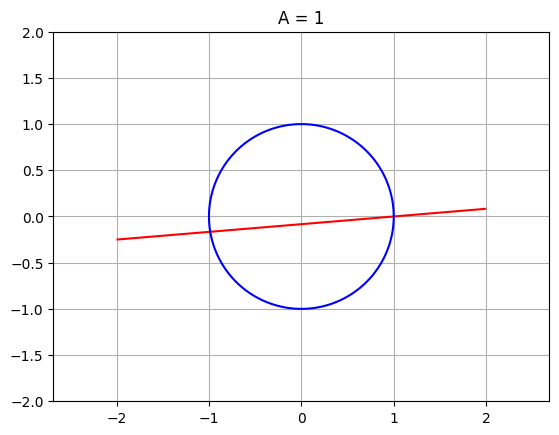

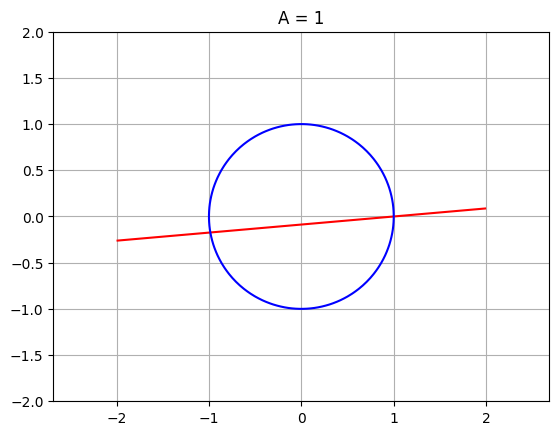

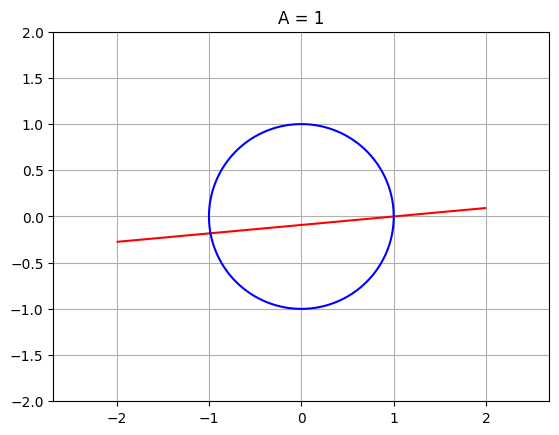

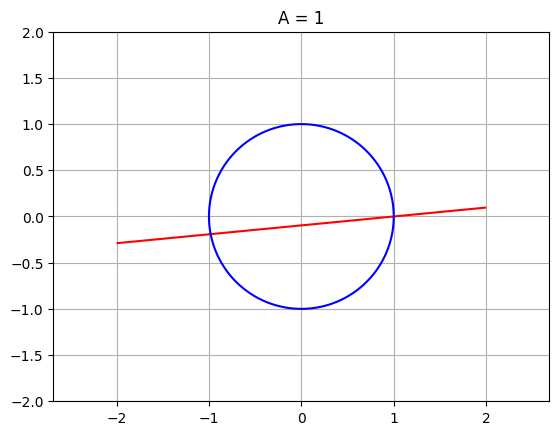

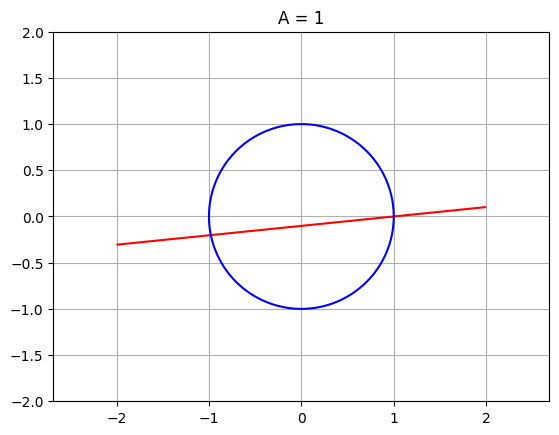

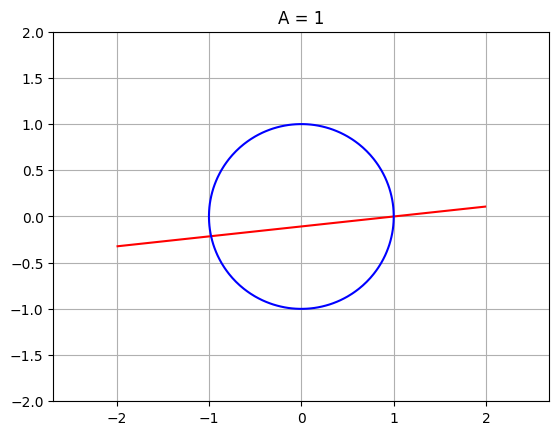

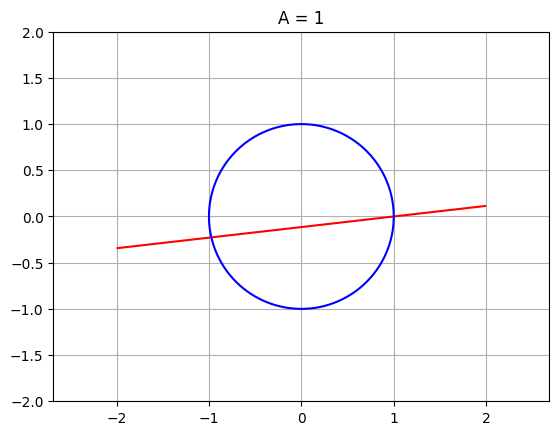

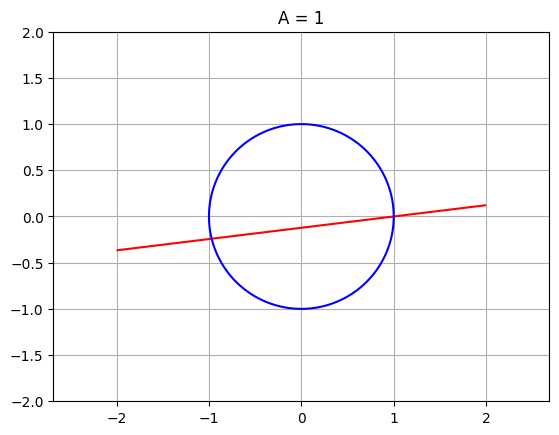

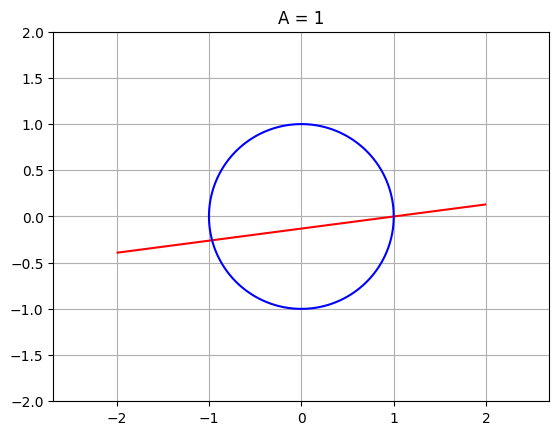

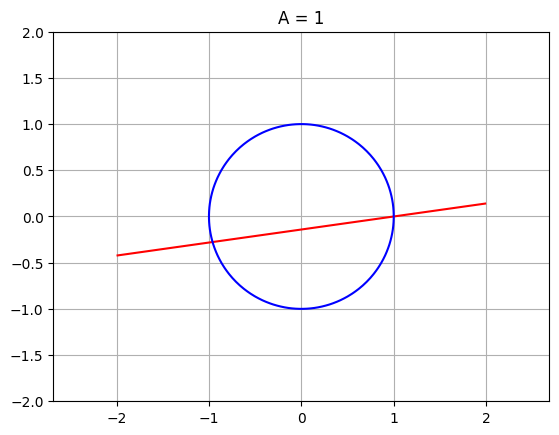

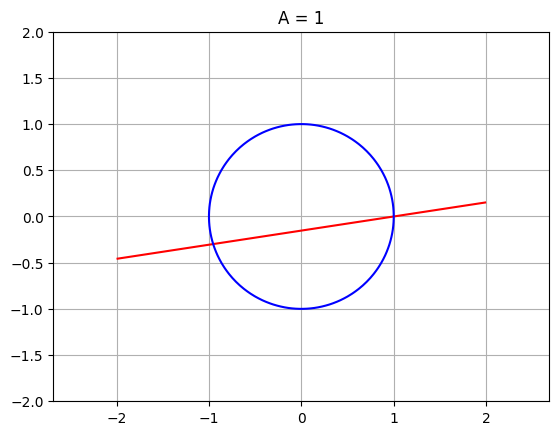

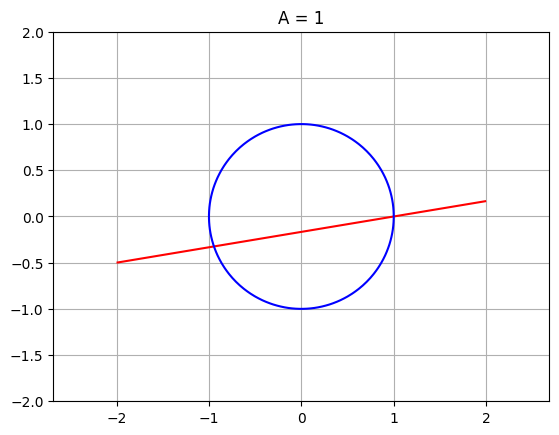

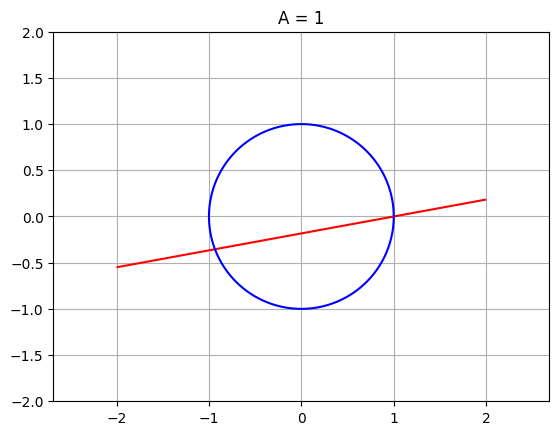

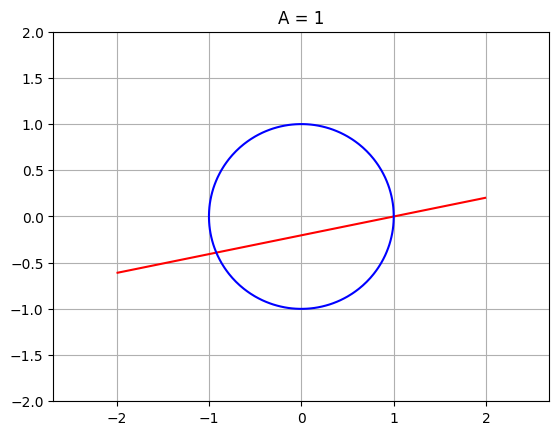

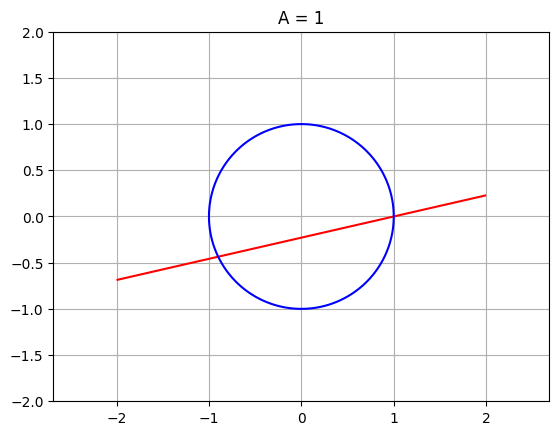

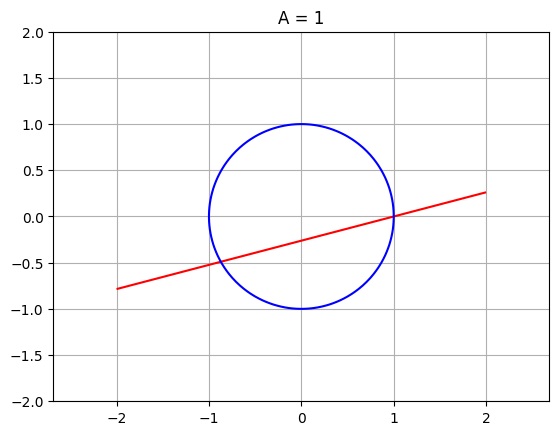

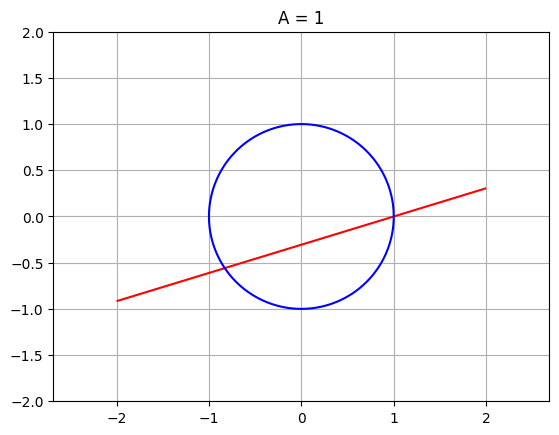

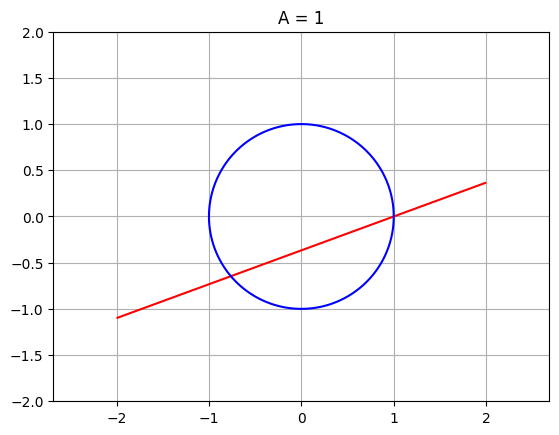

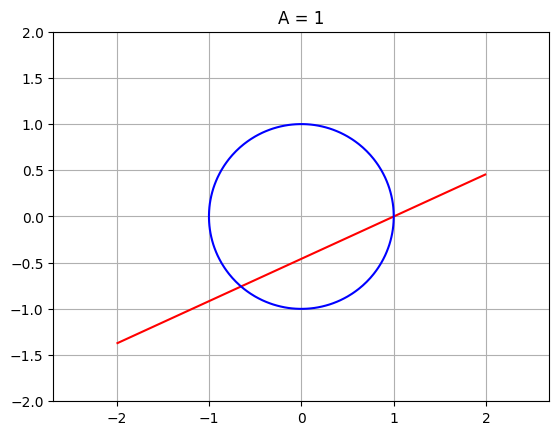

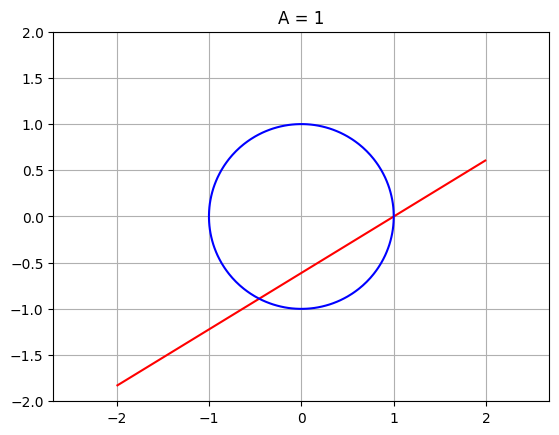

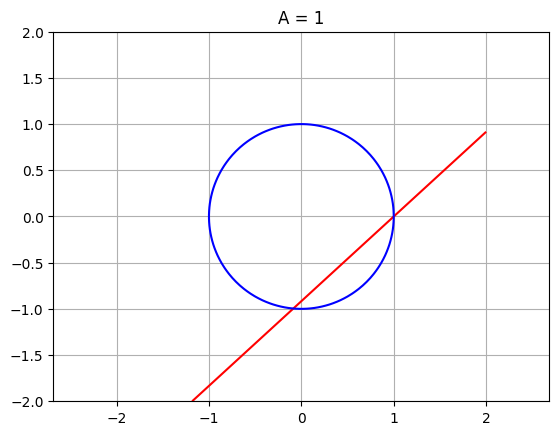

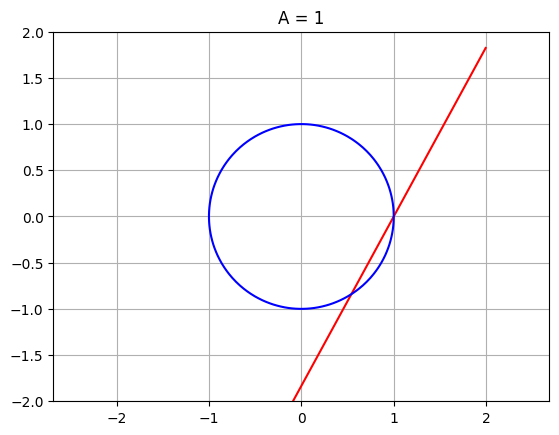

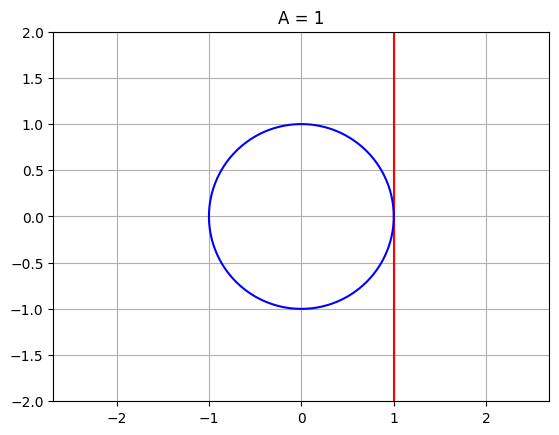

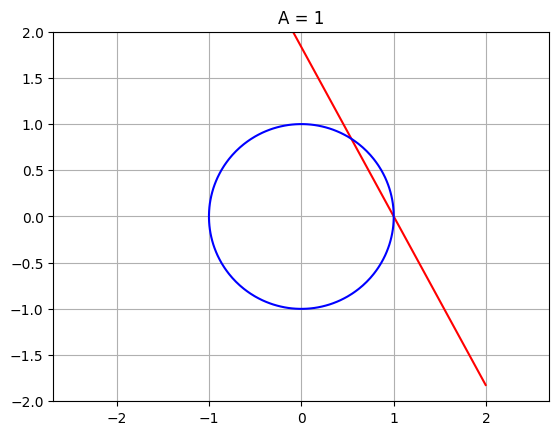

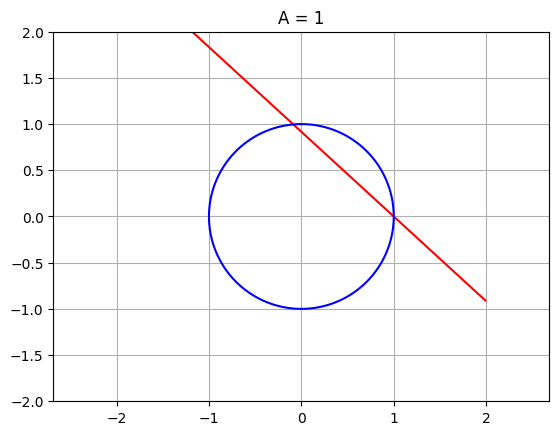

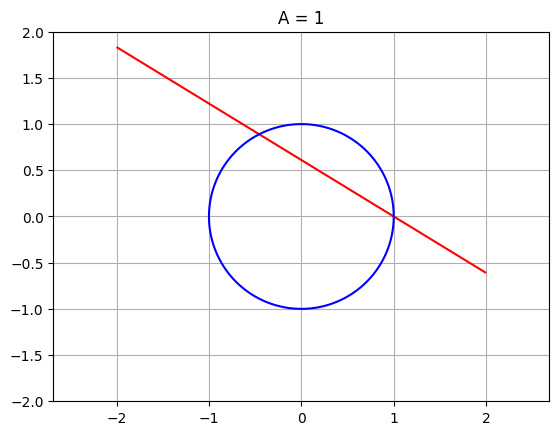

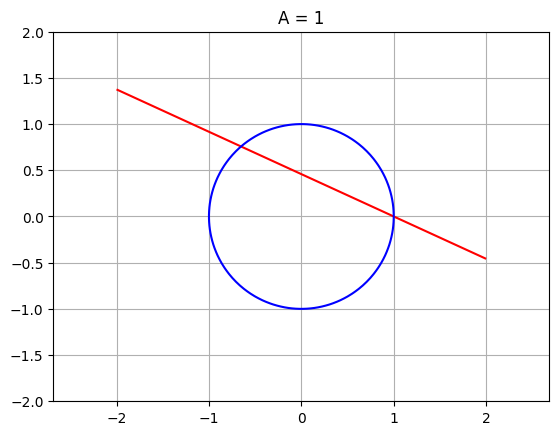

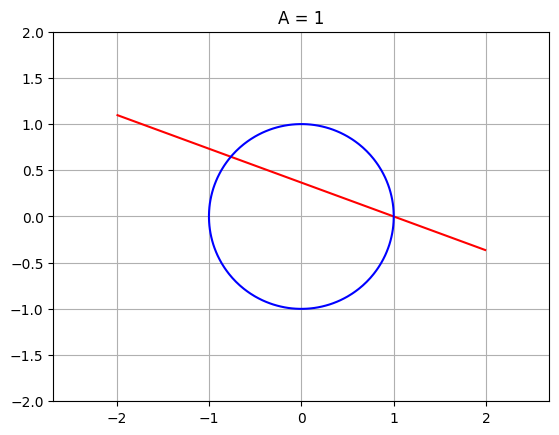

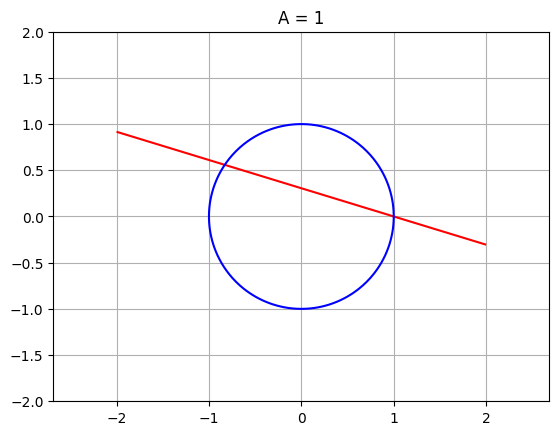

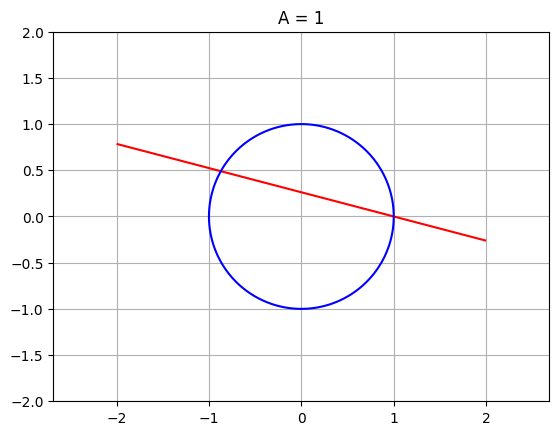

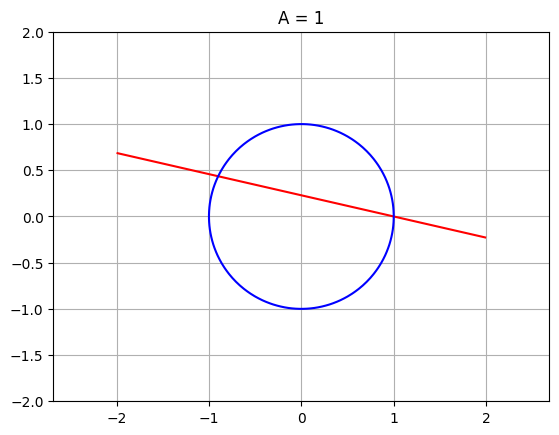

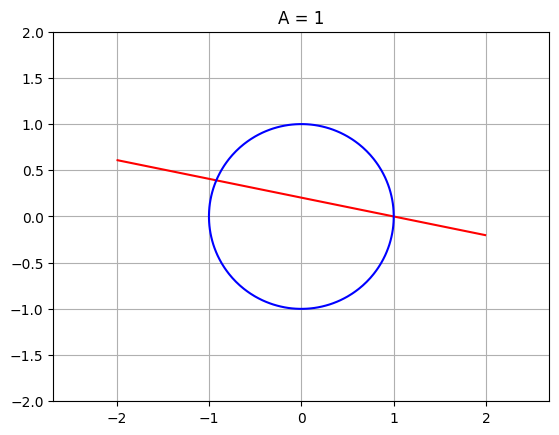

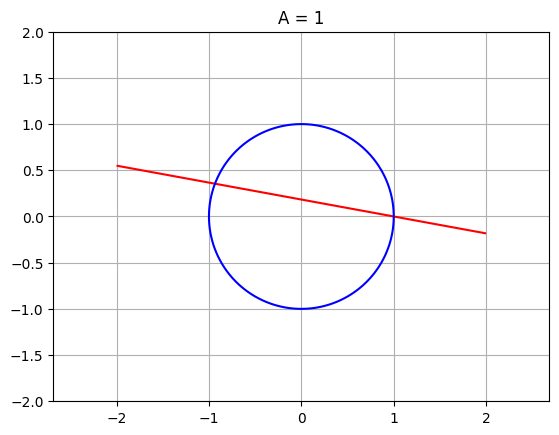

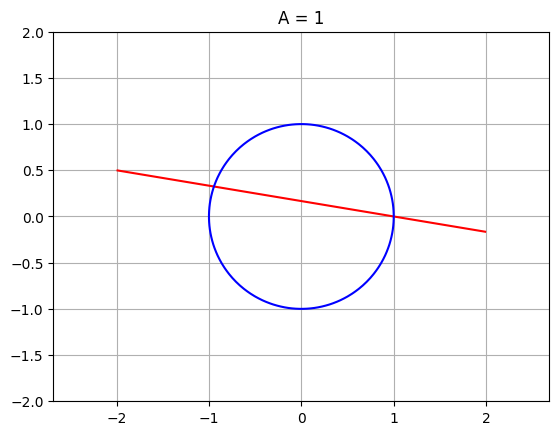

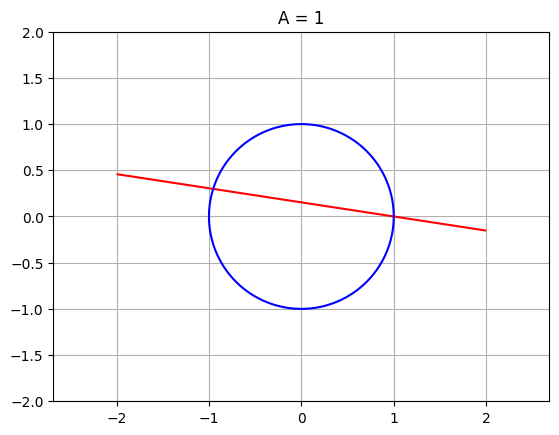

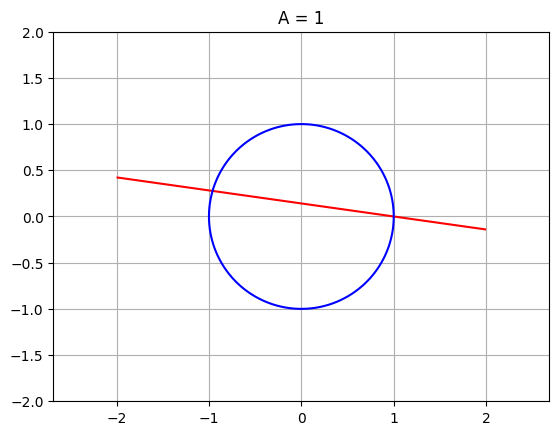

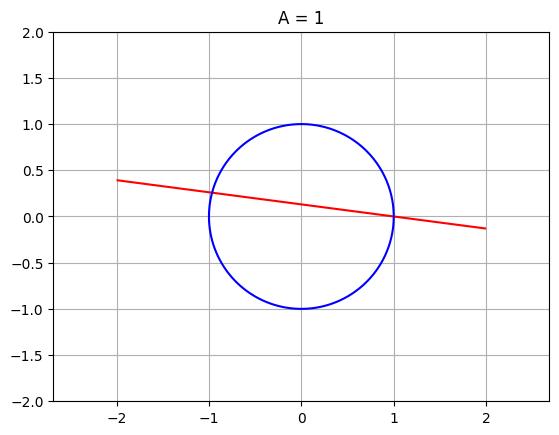

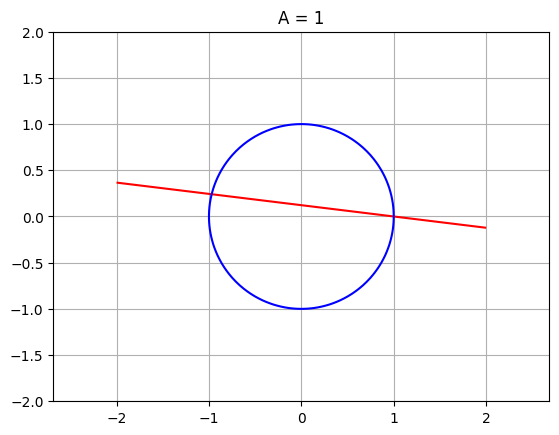

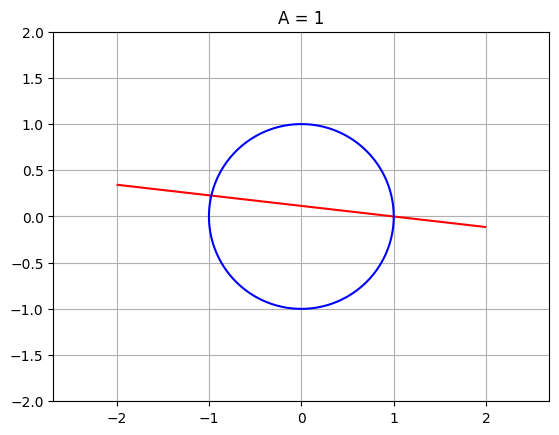

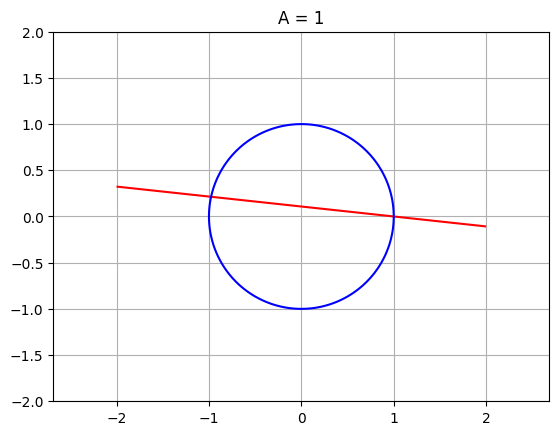

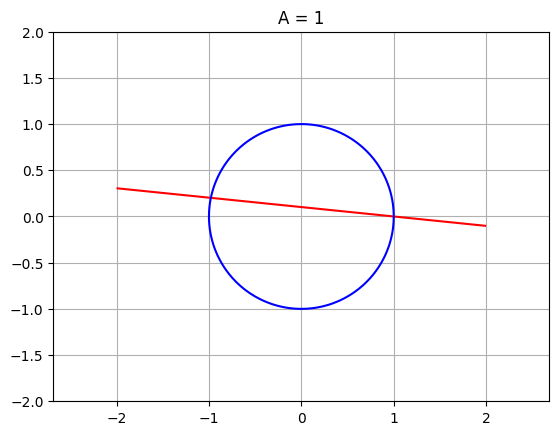

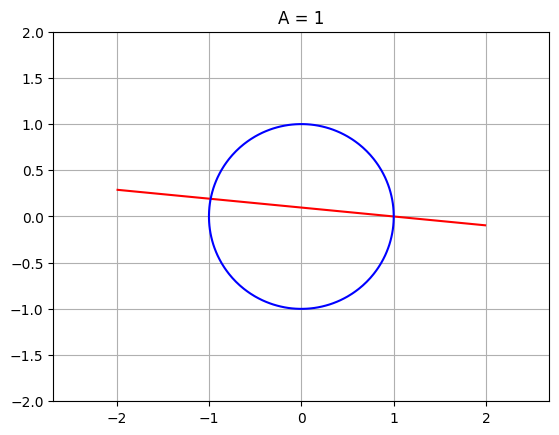

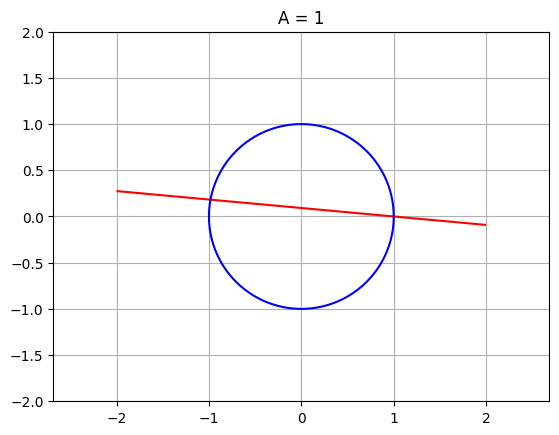

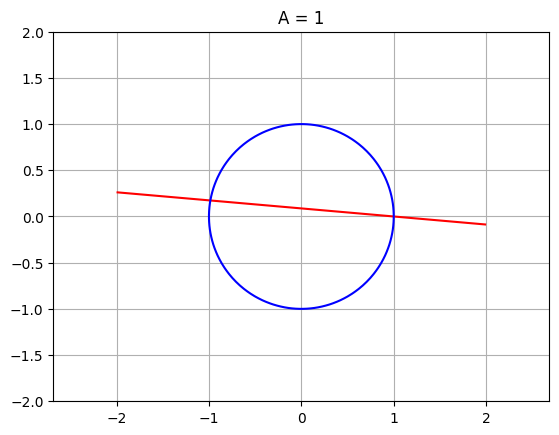

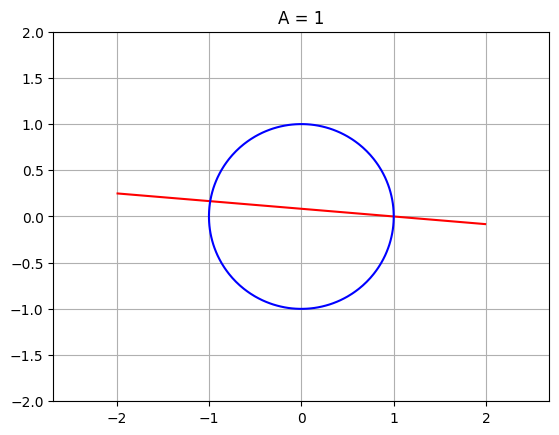

In [21]:
from sympy.abc import a, b, c, x, y, z

C = 1
A = 1

for B in np.linspace(-12, 12, 45):
    f = a*x + b*y - C
    g = x**2 + y**2 - 1
    plt.title("A = " + str(A))
    run(f, g, x, y, 1, B)